In [52]:
# 지피티
# 템플릿이 입력 이미지와 정확히 일치할 때 잘 작동합니다. 
# 하지만 템플릿 이미지가 입력 이미지의 변형(회전, 크기 변화, 조명 변화 등)에 민감할 수 있습니다. 
# 이러한 경우에는 Feature Matching 기술(예: ORB, SIFT 등)이 더 효과적일 수 있습니다.
import cv2 as cv
import numpy as np
import time
st = time.time()
# 템플릿 이미지와 입력 이미지 로드
template = cv.imread(r'C:\source\exercise\opencv_study\goblin_text.png')  # 100x100 픽셀 템플릿 이미지
screen = cv.imread('screenshot.png')  # 화면 캡처 이미지
lt = time.time()
for i in range(10): # 스크린에 사각형을 그려서 다음 탬플린이 검색이 되네 ㅋㅋㅋ
    # 템플릿과 입력 이미지의 크기
    w, h = template.shape[1], template.shape[0]

    # 템플릿 매칭
    result = cv.matchTemplate(screen, template, cv.TM_CCOEFF_NORMED)

    # 매칭 결과의 위치와 값을 찾음
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

    # 가장 높은 매칭 점을 기준으로 사각형 그리기
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(screen, top_left, bottom_right, (0, 255, 0), 2)

et = time.time()
print(et- st)
print(lt - st)
# 결과 출력
cv.imshow('Matched Result', screen)
cv.waitKey(0)
cv.destroyAllWindows()


1.0253913402557373
0.041152238845825195


In [ ]:
# 교재
import sys
import numpy as np
import cv2


img = cv2.imread('circuit.bmp', cv2.IMREAD_COLOR)
templ = cv2.imread('crystal.bmp', cv2.IMREAD_COLOR)

if img is None or templ is None:
    print('Image load failed!')
    sys.exit()

img = img + (50, 50, 50)

noise = np.zeros(img.shape, np.int32)
cv2.randn(noise, 0, 10)
img = cv2.add(img, noise, dtype=cv2.CV_8UC3)

res = cv2.matchTemplate(img, templ, cv2.TM_CCOEFF_NORMED)
res_norm = cv2.normalize(res, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

_, maxv, _, maxloc = cv2.minMaxLoc(res)
print('maxv:', maxv)

(th, tw) = templ.shape[:2]
cv2.rectangle(img, maxloc, (maxloc[0] + tw, maxloc[1] + th), (0, 0, 255), 2)

cv2.imshow('templ', templ)
cv2.imshow('res_norm', res_norm)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


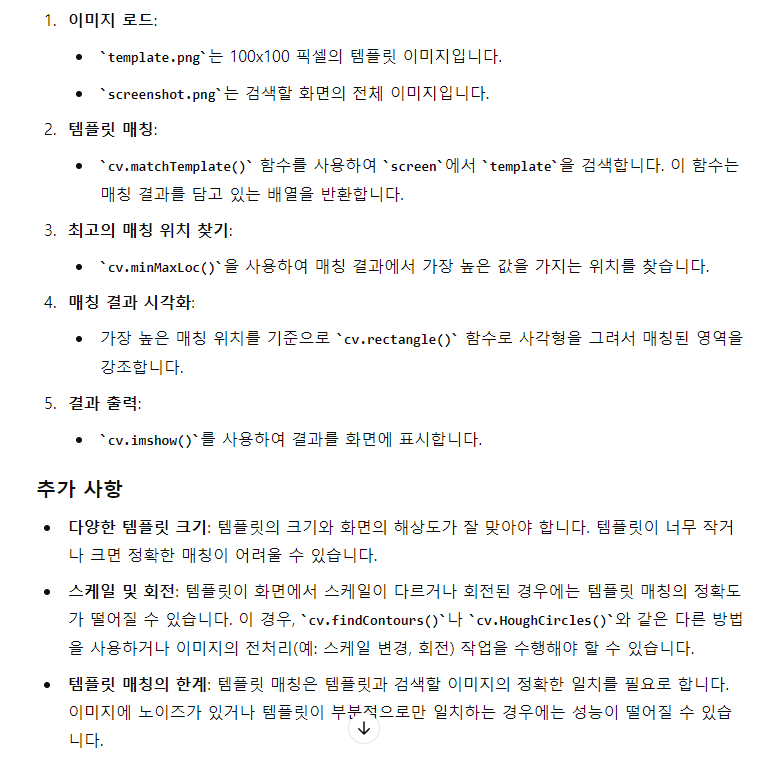

In [39]:
import cv2
import numpy as np

# 이미지를 읽어옵니다.
src1 = cv2.imread('goblin_text.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('screenshot.png', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    exit()

# ORB 디스크립터를 생성합니다.
orb = cv2.ORB_create()

# 키포인트와 디스크립터를 추출합니다.
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

# BFMatcher를 사용하여 디스크립터를 매칭합니다.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)

# 매칭된 결과를 시각화합니다.
matches = sorted(matches, key=lambda x: x.distance)
print(matches)
good_matches = matches[:50]  # 상위 50개의 매칭 결과만 선택합니다.

# 매칭된 점이 4개 이상인지 확인합니다.
if len(good_matches) >= 4:
    # 호모그래피를 찾고, 원본 이미지의 사각형을 변환하여 그립니다.
    pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
    pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

    H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

    (h, w) = src1.shape[:2]
    corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
    corners2 = cv2.perspectiveTransform(corners1, H)
    corners2 = corners2 + np.float32([w, 0])

    dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2.polylines(dst, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)

    # 결과를 보여줍니다.
    cv2.imshow('dst', dst)
    cv2.waitKey()
    cv2.destroyAllWindows()
else:
    print('Not enough matches found.')

[]
Not enough matches found.


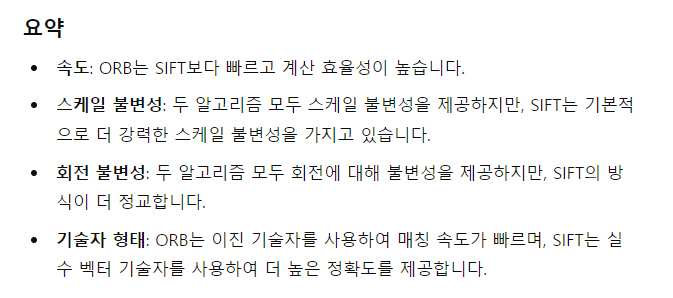

In [38]:
# ORB
import cv2 as cv
import numpy as np

# 이미지 로드
img = cv.imread(r'C:\source\exercise\opencv_study\goblin_text.png')  # 자신의 이미지 경로로 변경

if img is None:
    print('Image load failed!')
    exit()

# ORB 특징 검출기 생성
# ORB 특징 검출기 생성 (특징점 수를 늘려서 시도)
orb = cv.ORB_create(nfeatures=500)  # 특징점 수를 500으로 설정

# 특징점 및 기술자 검출
keypoints, descriptors = orb.detectAndCompute(img, None)
print(keypoints, descriptors)
# 특징점 이미지에 그리기
img_with_keypoints = cv.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=cv.DrawMatchesFlags_DEFAULT)

# 결과 출력
cv.imshow('ORB Keypoints', img_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()


() None


In [11]:
# sift 
import cv2 as cv

# 이미지 로드
img = cv.imread(r'C:\source\exercise\opencv_study\goblin_text.png')
img2 = cv.imread(r'C:\source\exercise\opencv_study\screenshot.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# SIFT 특징 검출기 생성
sift = cv.SIFT_create()

# 특징점 및 기술자 검출
keypoints, descriptors = sift.detectAndCompute(gray, None)

# 특징점 이미지에 그리기
img_with_keypoints = cv.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=cv.DrawMatchesFlags_DEFAULT)

# 결과 출력
cv.imshow('SIFT Keypoints', img_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()



In [25]:
# sift 단일 매칭 
import cv2 as cv
import numpy as np
import time

start_time = time.time()
# 이미지 로드
img1 = cv.imread(r'C:\source\exercise\opencv_study\goblin_text.png')  # 템플릿 이미지
img2 = cv.imread(r'C:\source\exercise\opencv_study\screenshot.png')  # 입력 이미지

# 회색조 이미지 변환
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# SIFT 특징 검출기 생성
sift = cv.SIFT_create()

# 특징점 및 기술자 검출
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)
print(type(keypoints1), type(descriptors1), len(keypoints1))
print(type(keypoints2), type(descriptors2), len(keypoints2))
# BFMatcher를 사용하여 매칭
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
print(len(matches))
# 매칭된 점들을 거리 기준으로 정렬
matches = sorted(matches, key=lambda x: x.distance)
print(len(matches))
# 매칭된 점들 중 상위 10개를 선택
good_matches = matches[:1000]

# 매칭된 점들을 그림
img_matches = cv.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 매칭된 점들의 위치를 사용하여 사각형을 그림
for match in good_matches:
    img2_point = keypoints2[match.trainIdx].pt
    img1_point = keypoints1[match.queryIdx].pt
    x1, y1 = int(img1_point[0]), int(img1_point[1])
    x2, y2 = int(img2_point[0]), int(img2_point[1])
    cv.line(img2, (x2, y2), (x2, y2), (0, 255, 0), 2)

end_time = time.time()
print(end_time - start_time, end_time, start_time)
# 결과 출력
cv.imshow('Matches', img_matches)
cv.waitKey(0)
cv.destroyAllWindows()


<class 'tuple'> <class 'numpy.ndarray'> 29
<class 'tuple'> <class 'numpy.ndarray'> 4671
29
29
0.3509361743927002 1725589579.761055 1725589579.4101188


In [44]:
# sift 복수 매칭 ......... 안되네
import cv2 as cv
import numpy as np
import time

start_time = time.time()
# 이미지 로드
img1 = cv.imread(r'C:\source\exercise\opencv_study\goblin_text.png')  # 템플릿 이미지
img2 = cv.imread(r'C:\source\exercise\opencv_study\screenshot.png')  # 입력 이미지

# 회색조 이미지 변환
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)


# 두 이미지의 SIFT 특징점 및 기술자 생성
sift = cv.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)
print(type(keypoints1), type(descriptors1), len(keypoints1))
print(type(keypoints2), type(descriptors2), len(keypoints2))
# BFMatcher 객체 생성 (crossCheck=False)
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=False)

# 매칭 수행
matches = bf.knnMatch(descriptors1, descriptors2, k=2)
print(len(matches))
# matches = bf.match(descriptors1, descriptors2)

# 매칭 결과를 필터링 (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# 매칭된 특징점 그리기
img_matches = cv.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 매칭된 점들의 위치를 사용하여 사각형을 그림
for match in good_matches:
    img2_point = keypoints2[match.trainIdx].pt
    img1_point = keypoints1[match.queryIdx].pt
    x1, y1 = int(img1_point[0]), int(img1_point[1])
    x2, y2 = int(img2_point[0]), int(img2_point[1])
    cv.line(img2, (x2, y2), (x2, y2), (0, 255, 0), 2)

end_time = time.time()
print(end_time - start_time, end_time, start_time)
# 결과 출력
cv.imshow('Matches', img_matches)
cv.waitKey(0)
cv.destroyAllWindows()


<class 'tuple'> <class 'numpy.ndarray'> 29
<class 'tuple'> <class 'numpy.ndarray'> 4671
29
0.3058035373687744 1725591033.3708446 1725591033.065041


In [61]:
import time
st = time.time()
import cv2 as cv
import cupy as cp # 처음 초기화 하는데 시간이 1초 넘게 걸림. 로드 되어있으면 시간 안걸림.
from PIL import ImageGrab 

screenshot = ImageGrab.grab()


et = time.time()
print(et - st)

0.047614097595214844


In [83]:
import mss
import numpy as np
import cupy as cp
import cv2
import time

frame_count = [] # 그냥 리스트 # cp.array([])

with mss.mss() as sct:
    # 모니터의 전체 화면을 캡처
    # monitor = {"top": 0, "left": 0, "width": 1920 //2, "height": 1080//2}  # 화면 해상도에 맞게 조정
    monitor = {"top": 0, "left": 0, "width": 960, "height": 540}  # 화면 해상도에 맞게 조정
    while True:
        # 화면 캡처
        st = time.time()
        img = sct.grab(monitor)
        # img = np.array(img)  # NumPy 배열로 변환
        img = cp.asnumpy(img)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 변환

        et = time.time()
        if len(frame_count) == 60 :
            frame_count.pop(0)
        frame_count.append(et - st)
        print(et - st, cp.array(frame_count).mean(), len(frame_count))
        # 화면에 결과를 표시
        cv2.namedWindow('Screen Capture')
        cv2.moveWindow('Screen Capture', 960, 540-100)
        cv2.imshow("Screen Capture", img)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        



cv2.destroyAllWindows()


0.013840913772583008 0.013840913772583008 1
0.024121761322021484 0.018981337547302246 2
0.0266416072845459 0.02153476079305013 3
0.012461662292480469 0.019266486167907715 4
0.013969659805297852 0.01820712089538574 5
0.012506484985351562 0.017257014910380047 6
0.027297258377075195 0.01869133540562221 7
0.01296544075012207 0.017975598573684692 8
0.013311624526977539 0.017457379235161677 9
0.014459371566772461 0.017157578468322755 10
0.016852140426635742 0.017129811373623936 11
0.021753549575805664 0.017515122890472412 12
0.00507664680480957 0.016558317037729118 13
0.006745815277099609 0.01585742405482701 14
0.011505126953125 0.015567270914713542 15
0.008894205093383789 0.015150204300880432 16
0.00827479362487793 0.014745768378762639 17
0.009572744369506836 0.014458378156026205 18
0.008646488189697266 0.014152489210429945 19
0.010624885559082031 0.01397610902786255 20
0.012084007263183594 0.013886008943830217 21
0.013751745223999023 0.013879906047474255 22
0.018314361572265625 0.014072708